<a href="https://colab.research.google.com/github/MBENALLA/AI-ML-algorithms/blob/main/autoencoders_uncertaintyQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Reshape
from tensorflow.keras.regularizers import l2

In [107]:
# the code below defines the dataset
x = np.linspace(-15, 15, 100)
y = x
x_train = np.random.uniform(3, 10, 60)
y_train = x_train + np.random.randn(*x_train.shape)*0.8
x_train = np.concatenate([x_train, np.random.uniform(-10, -3, 60)])
y_train = np.concatenate([y_train, x_train[60:] + np.random.randn(*x_train[60:].shape)*0.2])
x_test = np.linspace(-20,20,100)

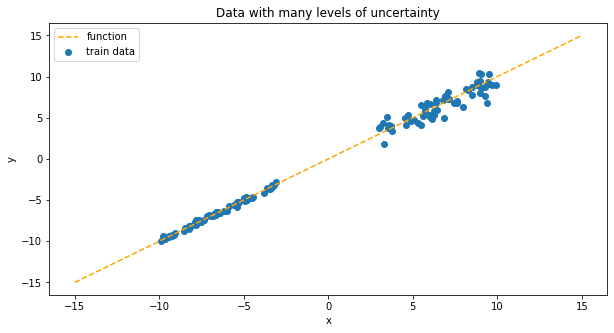

In [119]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train, y_train, label='train data')
ax.plot(x, y, ls='--', label='function', color='orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Data with many levels of uncertainty');

In [111]:
# an autoencoder for a regression modelling

def autoencoders_architecture(input_dim, layers_shape, act, reg, dropout_proba, latent_dim, output_dim, verbose=True):
  inputs = Input(shape=(input_dim,))
  hidden_enc = Dense(layers_shape[0], activation=act, kernel_regularizer=l2(reg))(inputs)
  for i in range(len(layers_shape)-1):
    if dropout_proba > 0:
      hidden_enc = Dropout(dropout_proba)(hidden_enc, training=True)
    hidden_enc = Dense(layers_shape[i+1], activation=act, kernel_regularizer=l2(reg))(hidden_enc)
  latent = Dense(latent_dim, activation=act)(hidden_enc)
  hidden_dec = Dense(layers_shape[-1], activation=act, kernel_regularizer=l2(reg))(latent)
  for i in range(len(layers_shape)-2, -1, -1):
    if dropout_proba > 0:
      hidden_dec = Dropout(dropout_proba)(hidden_dec, training=True)
    hidden_dec = Dense(layers_shape[i], activation=act, kernel_regularizer=l2(reg))(hidden_dec)
  outputs = Dense(output_dim, kernel_regularizer=l2(reg))(hidden_dec)
  model = Model(inputs, outputs)
  if verbose:
    model.summary()
  return model

In [112]:
# building an autoencoder without dropout 
out_model_dropout = autoencoders_architecture(input_dim=1,
                                              layers_shape=[10,32],
                                              act='relu',
                                              reg=0,
                                              dropout_proba=0,
                                              latent_dim=20,
                                              output_dim=1)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_62 (Dense)            (None, 10)                20        
                                                                 
 dense_63 (Dense)            (None, 32)                352       
                                                                 
 dense_64 (Dense)            (None, 20)                660       
                                                                 
 dense_65 (Dense)            (None, 32)                672       
                                                                 
 dense_66 (Dense)            (None, 10)                330       
                                                                 
 dense_67 (Dense)            (None, 1)                 11  

In [113]:
# building an autoencoder with dropout 
in_model_dropout = autoencoders_architecture(input_dim=1,
                                              layers_shape=[10,32],
                                              act='relu',
                                              reg=0.05,
                                              dropout_proba=0.1,
                                              latent_dim=20,
                                              output_dim=1)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_68 (Dense)            (None, 10)                20        
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_69 (Dense)            (None, 32)                352       
                                                                 
 dense_70 (Dense)            (None, 20)                660       
                                                                 
 dense_71 (Dense)            (None, 32)                672       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0   

In [115]:
out_model_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
out_history_dropout = out_model_dropout.fit(x_train, y_train, batch_size=10, 
                                                    epochs=100, shuffle=True, verbose=1)

print('model dropout compiling...')

in_model_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
in_history_dropout = in_model_dropout.fit(x_train, y_train, batch_size=10, 
                                              epochs=100, shuffle=True, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.5181 - mae: 0.4899
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4266 - mae: 0.4509
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4382 - mae: 0.4638
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4613 - mae: 0.4860
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4196 - mae: 0.4409
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4284 - mae: 0.4620
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4348 - mae: 0.4581
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4531 - mae: 0.4929
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4228 - mae: 0.4405
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4032 - mae: 0.4434
Epoch 11/100
12/12 [==============================] - 0s 3m

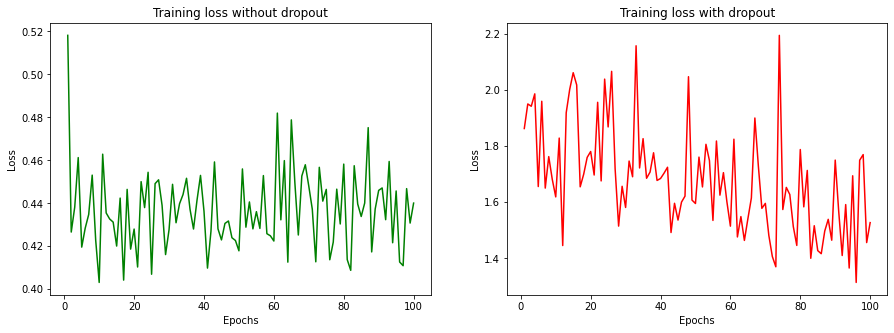

In [117]:
epochs = range(1, len(out_history_dropout.history['loss']) + 1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(epochs, out_history_dropout.history['loss'], 'green')
ax[0].set_title('Training loss without dropout')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(epochs, in_history_dropout.history['loss'], 'red')
ax[1].set_title('Training loss with dropout')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');

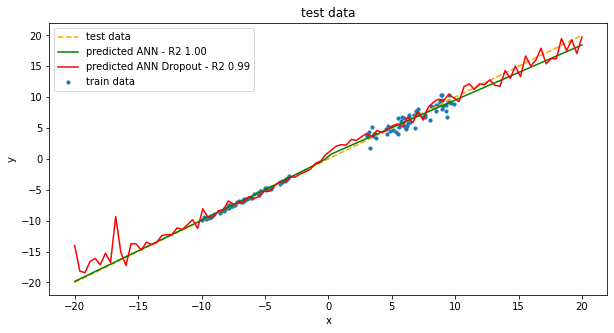

In [120]:
y_pred_without_dropout = out_model_dropout.predict(x_test)
y_pred_with_dropout = in_model_dropout.predict(x_test)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train, y_train, s=10, label='train data')
ax.plot(x_test, x_test, ls='--', label='test data', color='orange')
ax.plot(x_test, y_pred_without_dropout, label='predicted ANN - R2 {:.2f}'.format(r2_score(x_test, y_pred_without_dropout)), color='green')
ax.plot(x_test, y_pred_with_dropout, label='predicted ANN Dropout - R2 {:.2f}'.format(r2_score(x_test, y_pred_with_dropout)), color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('test data');

4/4 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


4/4 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


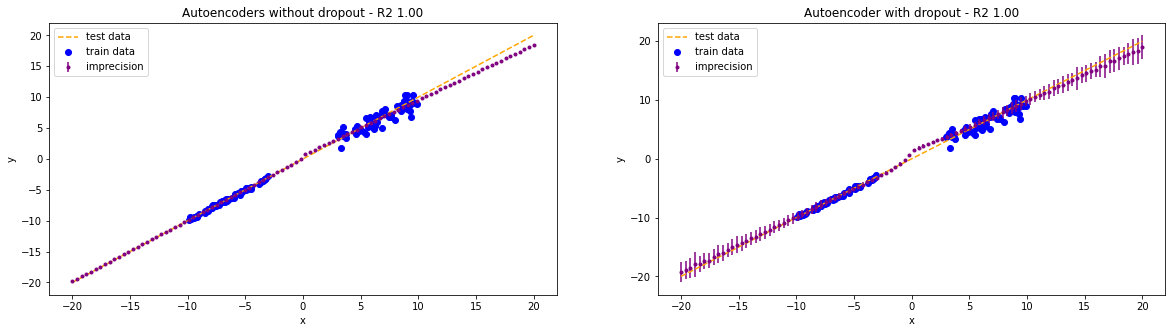

In [121]:
def plot_imprecise_uncertainty(model, ax, title, 
                     x_train=x_train, y_train=y_train, 
                     x_test=np.linspace(-20,20,100), y_test=np.linspace(-20,20,100),
                     T=200):
  predictions = []
  for _ in range(T):
      predictions += [model.predict(x_test,verbose=1)]    
  mean, std = np.mean(np.array(predictions), axis=0), np.std(np.array(predictions), axis=0)
  ax.plot(x_test, y_test, ls='--', color='orange', label='test data')
  ax.scatter(x_train, y_train, color='blue', label='train data')
  ax.errorbar(x_test, mean, yerr=std, fmt='.', color='purple', label='imprecision')
  ax.set_title('{} - R2 {:.2f}'.format(title, r2_score(y_test, mean)))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend();
  
  
  
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_imprecise_uncertainty(out_model_dropout, ax=ax[0], title='Autoencoders without dropout')
plot_imprecise_uncertainty(in_model_dropout, ax=ax[1], title='Autoencoders with dropout')